In [1]:
class Vec2():
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)
    
    def scale(self, alpha):
        return Vec2(self.x * alpha, self.y * alpha)
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
    def __add__(self, v2):
        return self.add(v2)
    
    def __mul__(self, alpha):
        return scale(self, alpha)
    
    def __rmul__(self, alpha):
        return scale(self, alpha)
    
    def __repr__(self):
        return "Vec2({}, {})".format(self.x, self.y)

In [2]:
Vec2(2, 2)

Vec2(2, 2)

In [3]:
Vec2(2, 2) + Vec2(3, 3)

Vec2(5, 5)

In [4]:
class Vec3():
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        
    def add(self, other):
        return Vec3(self.x + other.x, self.y + other.y, self.z + other.z)
    
    def scale(self, alpha):
        return Vec3(self.x * alpha, self.y * alpha, self.z * alpha)
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y and self.z == other.z
    
    def __add__(self, other):
        return self.add(other)
    
    def __mul__(self, alpha):
        return self.scale(alpha)
    
    def __rmul__(self, alpha):
        return self.scale(alpha)
    
    def __repr__(self):
        return "({},{},{})".format(self.x, self.y, self.z)

In [5]:
Vec3(2, 3, 5)

(2,3,5)

In [26]:
from abc import ABCMeta, abstractmethod, abstractproperty

class Vector(metaclass = ABCMeta):
    @abstractmethod
    def scale(self, alpha):
        pass
    
    @classmethod
    @abstractproperty
    def zero():
        pass
    
    @abstractmethod
    def add(self, other):
        pass
    
    def neg(self):
        return self.scale(-1)
    
    def subtract(self, other):
        return self.add(-1 * other)
    
    def __mul__(self, alpha):
        return self.scale(alpha)
    
    def __rmul__(self, alpha):
        return self.scale(alpha)
    
    def __add__(self, other):
        return self.add(other)
    
    def __sub__(self, other):
        return self.subtract(other)
    
    

In [7]:
class Vec3(Vector):
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    def add(self, other):
        return Vec3(self.x + other.x, self.y + other.y, self.z + other.z)
    
    def scale(self, alpha):
        return Vec3(self.x * alpha, self.y * alpha, self.z * alpha)
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y and self.z == other.z
    
    def __neq__(self):
        return self.scale(-1)
    
    def __repr__(self):
        return '({}, {}, {})'.format(self.x, self.y, self.z)

In [8]:
from abc import abstractproperty
from vectors import add, scale
class CoordinateVector(Vector):
    @abstractproperty
    def dimension(self):
        pass
    def __init__(self, *coordinates):
        self.coordinates = tuple(x for x in coordinates)
        
    def add(self, other):
        return self.__class__(*add(self.coordinates, other.coordinates))
    
    def scale(self, alpha):
        return self.__class__(*scale(alpha, self.coordinates))
    
    def __repr__(self):
        return "{}{}".format(self.__class__.__qualname__, self.coordinates)

In [11]:
class Vec3(Vector):
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    
    def add(self, other):
        return Vec3(self.x + other.x, self.y + other.y, self.z + other.z)
    
    def scale(self, alpha):
        return Vec3(alpha * self.x, alpha * self.y, alpha * self.z)
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y and self.z == other.z
    
    def __repr__(self):
        return "({}, {}, {})".format(self.x, self.y, self.z)

In [28]:
from abc import abstractproperty
from vectors import add, scale

class CoordinateVector(Vector):
    @abstractproperty
    def dimension(self):
        pass
    def __init__(self, *coordinates):
        self.coordinates = tuple(x for x in coordinates)
        
    def add(self, other):
        return self.__class__(*add(self.coordinates, other.coordinates))
    
    def scale(self, alpha):
        return self.__class__(*scale(alpha, self.coordinates))
    
    def __repr__(self):
        return "{}{}".format(self.__class__.__qualname__, self.coordinates)
    
    def __truediv__(self, alpha):
        return self.scale(1 / alpha)

In [29]:
class Vec6(CoordinateVector):
    def dimension(self):
        return 6
    
    def zero(self):
        return Vec6(0, 0, 0, 0, 0, 0)

In [30]:
Vec6(1, 2, 3, 4, 5, 6) + Vec6(1, 2, 3, 4, 5, 6)

Vec6(2, 4, 6, 8, 10, 12)

In [33]:
class Vec1(Vector):
    def __init__(self, x):
        self.x = x
    def add(self, other):
        return Vec1(self.x + other.x)
    def scale(self, alpha):
        return Vec1(alpha * self.x)
    @classmethod
    def zero(cls):
        return Vec1(0)
    def __eq__(self, other):
        return self.x == other.x
    def __repr__(self):
        return "({})".format(self.x)

In [34]:
Vec1(1)

(1)

In [35]:
class CarForSale():
    def __init__(self, model_year, mileage, price, posted_datetime,
                model, source, location, description):
        self.model_year = model_year
        self.mileage = mileage
        self.price = price
        self.posted_datetime = posted_datetime
        self.model = model 
        self.source = source
        self.location = location
        self.description = description

In [45]:
from vector_drawing import *
from math import *

def f(x):
    return 0.5 * x + 3
def g(x):
    return sin(x)
    
def plot(fs, xmin, xmax):
    xs = np.linspace(xmin, xmax, 100)
    fig, ax = plt.subplots()
    ax.axhline(y = 0, color = 'k')
    ax.axvline(x = 0, color = 'k')
    for f in fs:
        ys = [f(x) for x in xs]
        plt.plot(xs, ys)

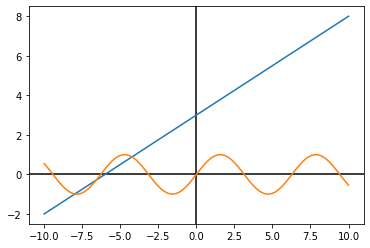

In [46]:
plot([f, g], -10, 10)
plt.show()